# LATIHAN 1 - LOADING AND EXPLORING DATASET

IMPORT LIBRARY

In [1]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

MEMBERIKAN NAMA PADA KOLOM DAN MEMBACA DATA CSV, SERTA MENCETAK 5 DATA PERTAMA UNTUK MENCARI APAKAH ADA DATA YANG HILANG ATAU TIDAK

In [2]:
column_names = ['CRIME', 'ZN', 'INDUS', 'CHAS', 'NOx', 'RM', 'AGE', 'DISTANCE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
data = pd.read_csv('boston housing.csv', header=1, delimiter=r"\s+", names=column_names)
print(data.head(5))

     CRIME    ZN  INDUS  CHAS    NOx     RM   AGE  DISTANCE  RAD    TAX  \
0  0.02729   0.0   7.07     0  0.469  7.185  61.1    4.9671    2  242.0   
1  0.03237   0.0   2.18     0  0.458  6.998  45.8    6.0622    3  222.0   
2  0.06905   0.0   2.18     0  0.458  7.147  54.2    6.0622    3  222.0   
3  0.02985   0.0   2.18     0  0.458  6.430  58.7    6.0622    3  222.0   
4  0.08829  12.5   7.87     0  0.524  6.012  66.6    5.5605    5  311.0   

   PTRATIO       B  LSTAT  MEDV  
0     17.8  392.83   4.03  34.7  
1     18.7  394.63   2.94  33.4  
2     18.7  396.90   5.33  36.2  
3     18.7  394.12   5.21  28.7  
4     15.2  395.60  12.43  22.9  


Mengecek kembali apakah ada data yang hilang atau tidak, pada output di bawah semua data tidak ada yang null

Mencetak info dari dataset, dimana dapat dilihat ada 504 baris atau data yang ada pada dataset, dimana ada 14 total kolom, dengan tipe data int dan float

Describe digunakan untuk menampilkan nilai statistika dari setiap kolom, dimana ada jumlah data, rata-rata, standar deviasi, dan kuartil

VARIABEL TARGET : MEDV (nilai median rumah yang ditempati pemilik)

In [3]:
print(data.info())
print('\n')
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CRIME     504 non-null    float64
 1   ZN        504 non-null    float64
 2   INDUS     504 non-null    float64
 3   CHAS      504 non-null    int64  
 4   NOx       504 non-null    float64
 5   RM        504 non-null    float64
 6   AGE       504 non-null    float64
 7   DISTANCE  504 non-null    float64
 8   RAD       504 non-null    int64  
 9   TAX       504 non-null    float64
 10  PTRATIO   504 non-null    float64
 11  B         504 non-null    float64
 12  LSTAT     504 non-null    float64
 13  MEDV      504 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.2 KB
None


            CRIME          ZN       INDUS        CHAS         NOx          RM  \
count  504.000000  504.000000  504.000000  504.000000  504.000000  504.000000   
mean     3.627796   11.373016   11.162361    0.069

# LATIHAN 2 - DATA PREPROCESSING

In [4]:
data.isnull().sum()

CRIME       0
ZN          0
INDUS       0
CHAS        0
NOx         0
RM          0
AGE         0
DISTANCE    0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT       0
MEDV        0
dtype: int64

In [5]:
data = data[~(data['MEDV'] >= 50.0)]
print(np.shape(data))

(488, 14)


Plotting data dari setiap kolom ke dalam histogram

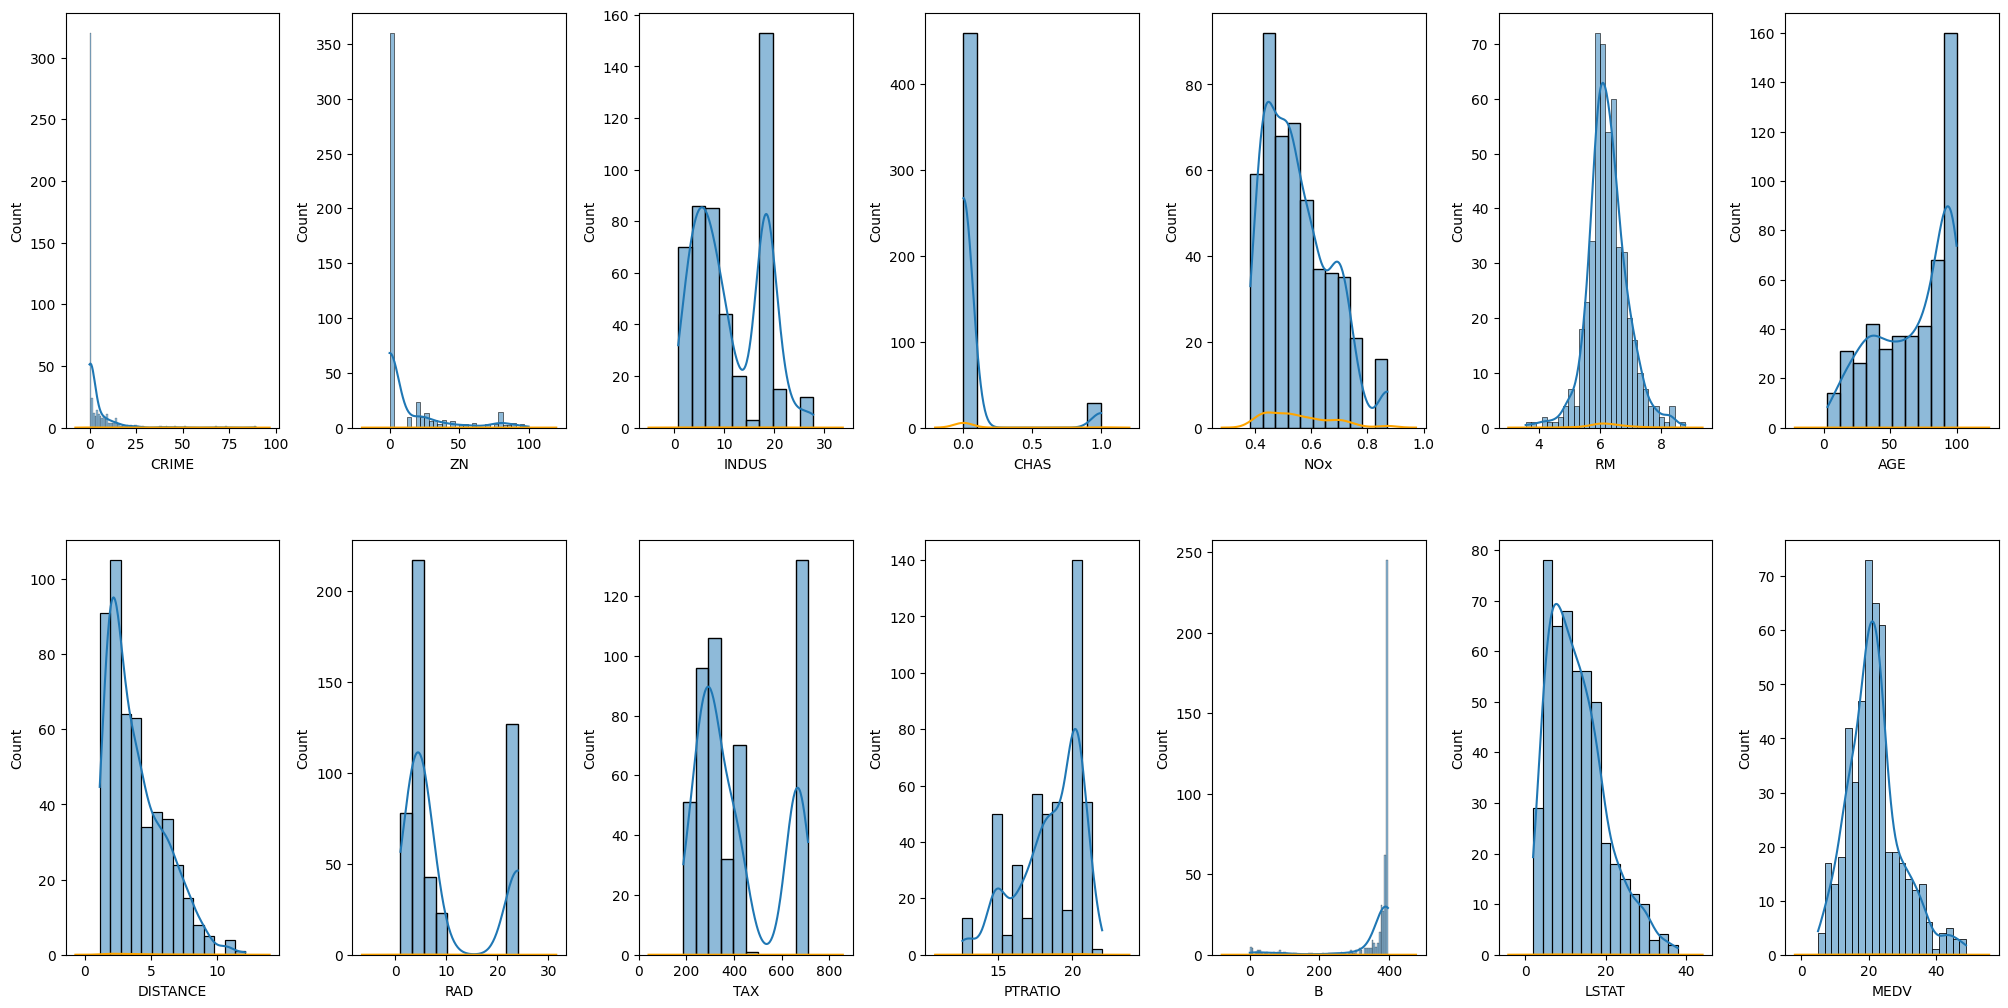

In [6]:
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()

for k, v in data.items():
    sns.histplot(v, ax=axs[index], kde=True)
    sns.kdeplot(v, ax=axs[index], color='orange')
    index += 1

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

PLOTTING DATA KE DALAM HEATMAP UNTUK MELIHAT KORELASI ANTAR VARIABEL

Korelasi positif yang tinggi antara fitur RM (jumlah rata-rata kamar per hunian) dan MEDV (nilai median rumah yang ditempati pemilik) (0.7) menunjukkan bahwa semakin besar jumlah rata-rata kamar, semakin tinggi pula nilai median rumah.

Korelasi negatif yang tinggi antara fitur LSTAT (persentase status sosial ekonomi rendah) dan MEDV (-0.74) menandakan bahwa semakin tinggi persentase status sosial ekonomi rendah dalam suatu wilayah, semakin rendah pula nilai median rumahnya.

<Axes: >

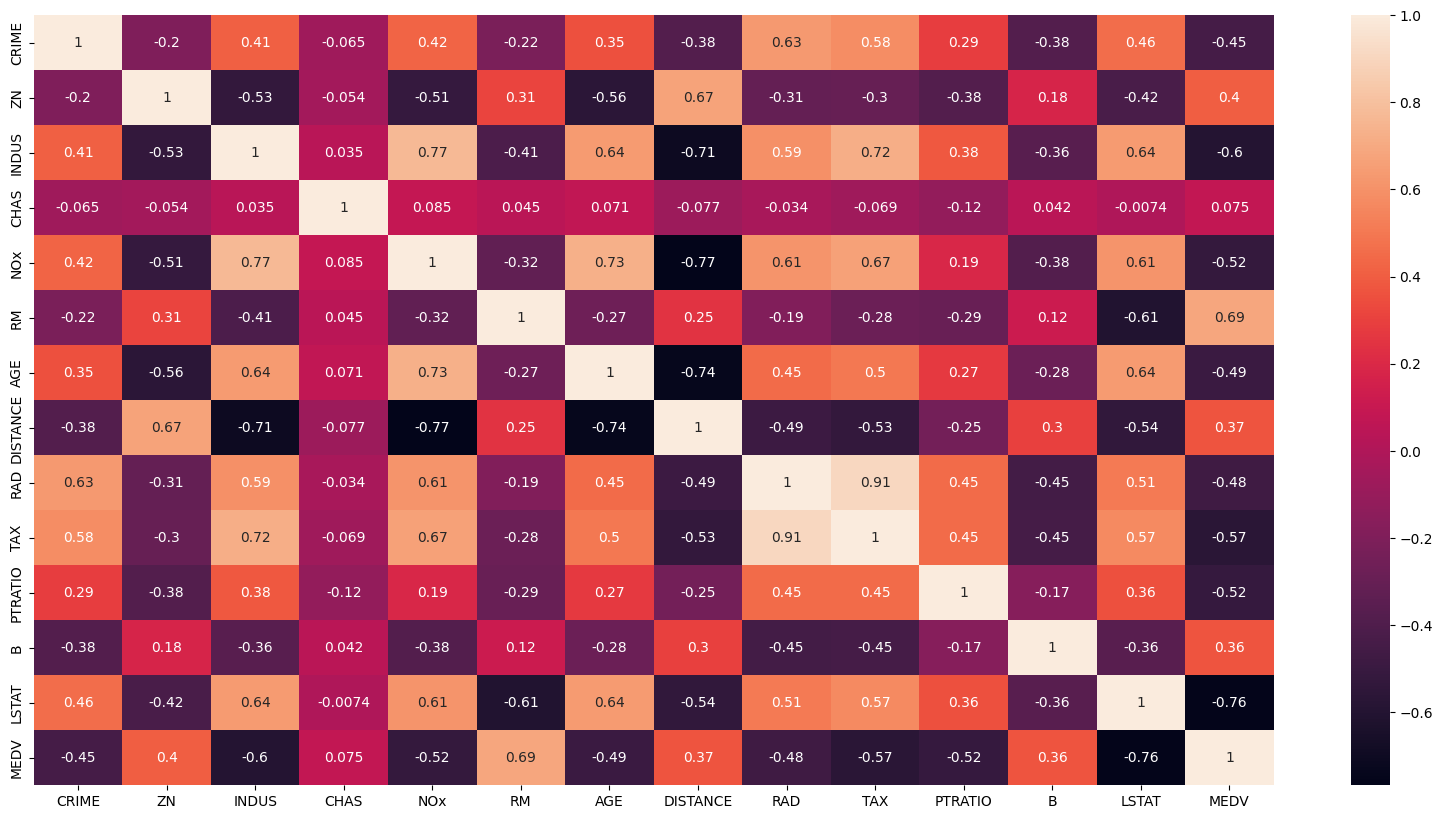

In [25]:
# correlation_matrix = data.corr().round(2)
# # annot = True to print the values inside the square
# sns.heatmap(data=correlation_matrix, annot=True)

plt.figure(figsize=(20, 10))
sns.heatmap(data.corr(),  annot=True)

PLOTTING DATA KE MODEL REGRESI LINEAR UNTUK SETIAP VARIABEL TERHADAP MEDV

Variabel LSTAT dan RM punya korelasi yang tinggi sehingga dalam model regresi setiap titiknya berada dekat dengan garis regresi

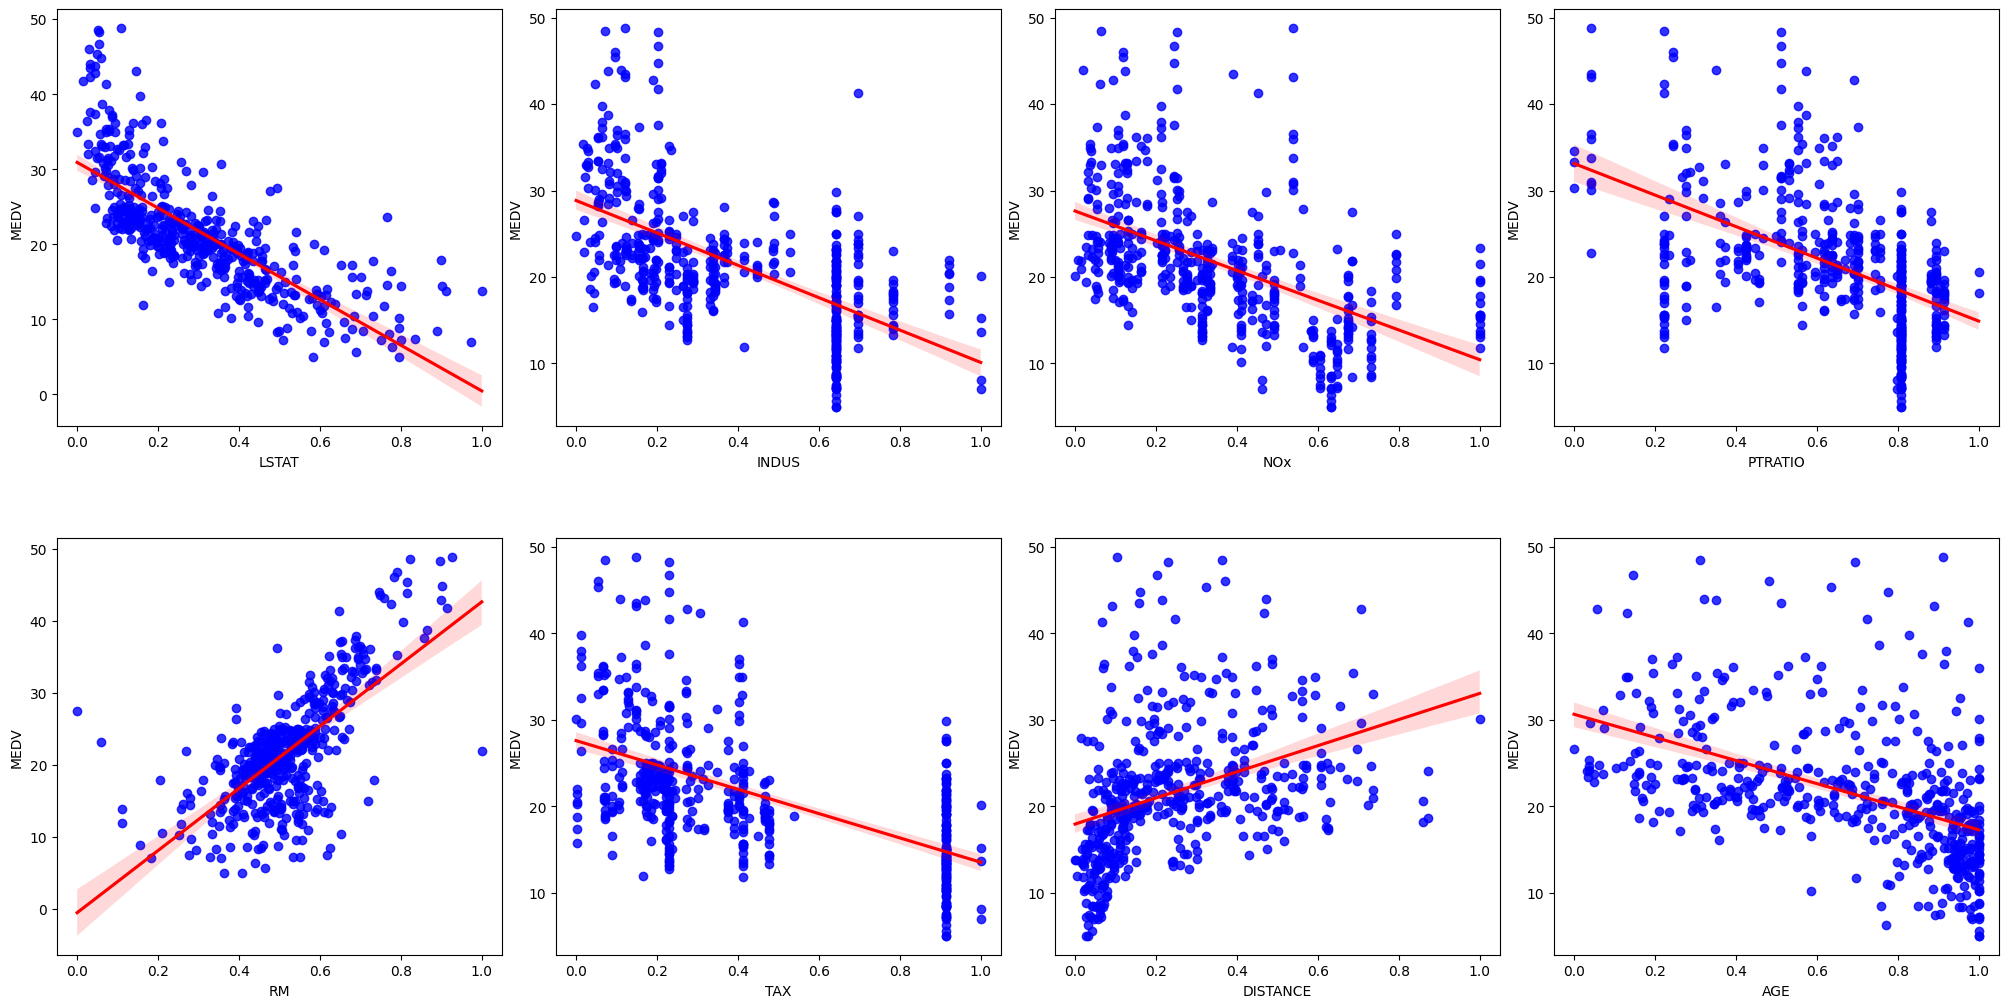

In [8]:
from sklearn import preprocessing
# Let's scale the columns before plotting them against MEDV
min_max_scaler = preprocessing.MinMaxScaler()
column_sels = ['LSTAT', 'INDUS', 'NOx', 'PTRATIO', 'RM', 'TAX', 'DISTANCE', 'AGE']
x = data.loc[:,column_sels]
y = data['MEDV']
x = pd.DataFrame(data=min_max_scaler.fit_transform(x), columns=column_sels)
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(20, 10))
index = 0
axs = axs.flatten()
for i, k in enumerate(column_sels):
    sns.regplot(y=y, x=x[k], ax=axs[i], scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

MEMPERSIAPKAN PEMODELAN DATA, DENGAN CARA MEMASTIKAN DATA MEMILIKI DISTRIBUSI YANG NORMAL

In [9]:
y =  np.log1p(y)
for col in x.columns:
    if np.abs(x[col].skew()) > 0.3:
        x[col] = np.log1p(x[col])

# LATIHAN 3 - LINEAR REGRESSION MODEL

MEMBUAT MODEL LINEAR REGRESI DAN MENCARI NILAI MSE

In [10]:
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
import numpy as np

l_regression = linear_model.LinearRegression()
kf = KFold(n_splits=10)
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
scores = cross_val_score(l_regression, x_scaled, y, cv=kf, scoring='neg_mean_squared_error')
print("Mean MSE: %0.2f" % (scores.mean()))

Mean MSE: -0.04


# TUGAS - LINEAR REGRESI

In [11]:
X = data.drop(columns=['MEDV', 'RAD'], axis='column')
X.columns

Index(['CRIME', 'ZN', 'INDUS', 'CHAS', 'NOx', 'RM', 'AGE', 'DISTANCE', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

MEMBAGI DATASET MENJADI 2 BAGIAN, DIMANA 80% DATA DIGUNAKAN UNTUK TRAINING DAN 20% DATA DIGUNAKAN UNTUK TESTING

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=2)

# DECISSION TREE REGRESSION

MEMBUAT MODEL DECISSION TREE REGRESSOR

In [13]:
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor(max_depth = 2)
DT.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=2)

In [14]:
from sklearn.model_selection import GridSearchCV
DT_params = {'max_depth': range(1,11)}
DT_grid_search = GridSearchCV(estimator = DT, param_grid = DT_params, cv=10,return_train_score = True )
DT_grid_search.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(max_depth=2),
             param_grid={'max_depth': range(1, 11)}, return_train_score=True)

MENAMPILKAN HASIL TRAINING DAN TEST DATA

In [15]:
DT_cv_results = pd.DataFrame(DT_grid_search.cv_results_)
DT_cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001594,0.000631,0.001216,0.000586,1,{'max_depth': 1},0.390833,0.465931,0.400718,0.532786,...,0.452027,0.438063,0.458650,0.456379,0.460590,0.459553,0.436111,0.457495,0.452126,0.008358
1,0.002288,0.000507,0.001349,0.000529,2,{'max_depth': 2},0.567791,0.703976,0.714335,0.781609,...,0.707279,0.700312,0.713708,0.721113,0.738451,0.723074,0.714475,0.704665,0.715403,0.010616
2,0.002148,0.000295,0.000951,0.000150,3,{'max_depth': 3},0.680024,0.748945,0.789007,0.781653,...,0.789755,0.787226,0.796342,0.815728,0.823829,0.803512,0.818163,0.789783,0.803841,0.012371
3,0.002393,0.000502,0.000985,0.000415,4,{'max_depth': 4},0.700723,0.785179,0.848913,0.790585,...,0.860966,0.855852,0.856951,0.880699,0.881075,0.871856,0.865466,0.858452,0.866959,0.008845
4,0.003100,0.000299,0.001209,0.000396,5,{'max_depth': 5},0.746522,0.812847,0.827770,0.815815,...,0.908482,0.899282,0.901934,0.916181,0.924931,0.914668,0.906606,0.895236,0.908940,0.008322
5,0.003640,0.000510,0.001372,0.000436,6,{'max_depth': 6},0.754721,0.781561,0.856846,0.804832,...,0.947881,0.937102,0.937784,0.941948,0.947617,0.943032,0.940834,0.932211,0.940863,0.004505
6,0.003988,0.000609,0.001472,0.000589,7,{'max_depth': 7},0.730037,0.777562,0.844213,0.828476,...,0.970030,0.960722,0.960344,0.964473,0.964009,0.964195,0.963781,0.958443,0.962535,0.003283
7,0.004175,0.000273,0.001566,0.000572,8,{'max_depth': 8},0.720364,0.813201,0.775667,0.858212,...,0.982748,0.973523,0.974505,0.976885,0.977103,0.975843,0.976037,0.975098,0.975976,0.002694
8,0.004130,0.000164,0.001365,0.000455,9,{'max_depth': 9},0.742613,0.759182,0.835254,0.875294,...,0.991200,0.984582,0.981595,0.985270,0.985533,0.984133,0.984163,0.986246,0.984739,0.002757
9,0.005090,0.001012,0.001469,0.000477,10,{'max_depth': 10},0.661246,0.763894,0.783066,0.864692,...,0.996938,0.991921,0.989163,0.990866,0.991576,0.992683,0.990079,0.993828,0.991584,0.002493


In [16]:
DT_cv_results[['params','mean_train_score','mean_test_score']]

,params,mean_train_score,mean_test_score
0,{'max_depth': 1},0.452126,0.410584
1,{'max_depth': 2},0.715403,0.639021
2,{'max_depth': 3},0.803841,0.671878
3,{'max_depth': 4},0.866959,0.699280
4,{'max_depth': 5},0.908940,0.694973
5,{'max_depth': 6},0.940863,0.708853
6,{'max_depth': 7},0.962535,0.675129
7,{'max_depth': 8},0.975976,0.684721
8,{'max_depth': 9},0.984739,0.657092
9,{'max_depth': 10},0.991584,0.651033


Mean Test Scores:
[0.41058443 0.63902067 0.67187793 0.69927966 0.69497298 0.70885254
 0.67512863 0.6847206  0.6570922  0.65103271]

Mean Train Scores:
[0.45212638 0.71540331 0.80384079 0.8669591  0.90894035 0.94086313
 0.96253548 0.97597577 0.98473896 0.99158396]


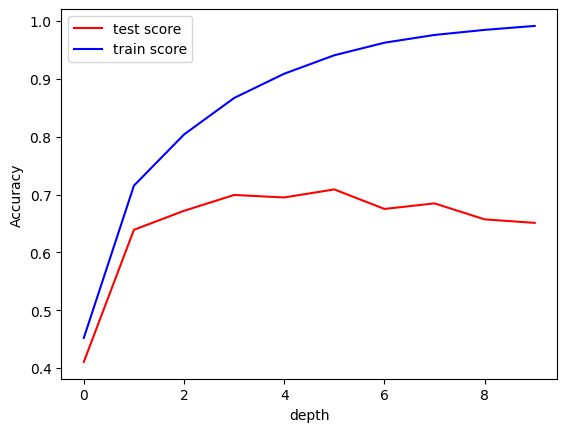

In [17]:
plt.plot(DT_grid_search.cv_results_['mean_test_score'], color='red')
plt.plot(DT_grid_search.cv_results_['mean_train_score'], color='blue')
plt.legend(['test score', 'train score'], loc='upper left')
plt.xlabel('depth')
plt.ylabel('Accuracy')

print("Mean Test Scores:")
print(DT_grid_search.cv_results_['mean_test_score'])
print("\nMean Train Scores:")
print(DT_grid_search.cv_results_['mean_train_score'])


Terdapat perbedaan yang cukup signifikan antara skor pada data pelatihan (train) dan data pengujian (test).

Pada skor data pelatihan, model memiliki skor yang sangat tinggi, mendekati 1.0, menunjukkan bahwa model hampir sempurna dalam menyesuaikan diri dengan data yang digunakan untuk pelatihan.

Namun, pada skor data pengujian, terdapat penurunan performa, meskipun masih dalam kisaran yang baik. Perbedaan antara skor pelatihan dan skor pengujian yang cukup besar menandakan adanya kemungkinan overfitting, yaitu ketika model terlalu fokus menyesuaikan diri dengan data pelatihan sehingga kehilangan kemampuan generalisasi pada data baru.

MENCARI ESTIMASTI NILAI MAX_DEPTH TERBAIK DARI HASIL TRAINING DAN TESTING

In [18]:
DT = DT_grid_search.best_estimator_
DT

DecisionTreeRegressor(max_depth=6)

MENAMPILKAN SCORE TESTING TERBAIK 

In [19]:
DT_cv_score = DT_grid_search.best_score_
DT_cv_score

0.7088525360915033

MEMBUAT PREDIKSI DARI HASIL TESTING

In [20]:
DT_predictions = DT.predict(X_test)

MEMBUAT DECISSION TREE DARI MODEL REGRESI YANG TELAH DIBUAT

In [21]:
from sklearn import tree

fig = plt.figure(figsize=(100,100))
_ = tree.plot_tree(DT, feature_names= ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX',
                                   'PTRATIO', 'B', 'LSTAT'],  
                   class_names=['MEDV'],
                   filled=True, node_ids = True)

MENCARI NILAI ROOT MEAN SQUARE ERROR

In [22]:
from sklearn.metrics import mean_squared_error
DT_RMSE = np.sqrt(mean_squared_error(Y_test, DT_predictions))
print(DT_RMSE)

0.18802645270025437


MENGEVALUASI MODEL

In [23]:
Models_eval = []
Models_eval.append(('Decision Tree',DT_RMSE,np.mean(DT_cv_score)))
Models_eval

[('Decision Tree', 0.18802645270025437, 0.7088525360915033)]

MEMVISUALISASIKAN BESAR PENGARUH VARIABEL LAIN TERHADAP VARIABEL TARGET YANG DIUJI, YAITU MEDV

<Axes: title={'center': 'Feature Importance'}>

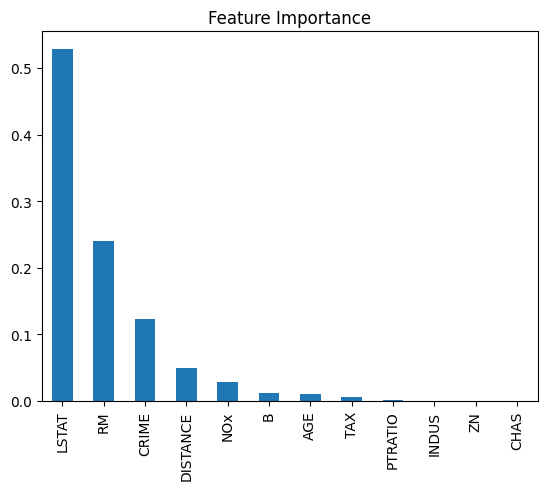

In [24]:
coef = pd.Series(DT.feature_importances_, X.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')